In [16]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 10)
import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
# plt.style.use('ggplot')


from sklearn.preprocessing import LabelBinarizer
from util_functions import *

days_predict = 1
test_size = 0.4

etfToSymbol = {

    'momentum': 'MTUM',
    'quality': 'QUAL',
    'value': 'VLUE',
}
symbols = list(etfToSymbol.values())

## Import dataset

In [17]:
dataDict = excel_to_dataDict('historical_data_robotrader.xlsx')

## Prepare dataset
### Input: adding features to input
### Target: get return of future days to predict

In [18]:
targetMatrix = get_target(dataDict=dataDict, symbols=list(etfToSymbol.values()), days_predict=days_predict)
inputMatrix = get_input(dataDict=dataDict)
# Clean nan data
inputMatrixClean = inputMatrix.dropna(axis=1)
inputMatrixClean.fillna(0,inplace=True)
targetMatrix = targetMatrix.T[inputMatrixClean.index].T
inputMatrixClean.head()

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,EUR,MTUM,QUAL,TNX,VLUE,spy,low_EUR,low_MTUM,low_QUAL,low_TNX,...,volume_QUAL,volume_TNX,volume_VLUE,volume_spy,high_EUR,high_MTUM,high_QUAL,high_TNX,high_VLUE,high_spy
2013-07-18,1.313925,50.613834,46.051929,2.534,48.876106,152.258530,1.30809,53.889999,50.150002,2.480,...,200,0,1500,103620100,1.31510,54.110001,50.230000,2.542,54.730000,169.270004
2013-07-19,1.314265,50.838329,45.693802,2.491,48.786808,152.529007,1.31276,54.279999,49.759998,2.484,...,3900,0,200,103831700,1.31548,54.389999,50.599998,2.535,54.630001,169.229996
2013-07-22,1.321250,50.903797,45.914188,2.488,48.920753,152.826553,1.31638,54.340000,49.950001,2.465,...,3500,0,1400,79428600,1.32304,55.049999,50.480000,2.494,54.990002,169.740005
2013-07-23,1.320590,50.819630,45.840729,2.516,48.920753,152.501953,1.31907,54.270000,49.900002,2.496,...,4700,0,0,80829700,1.32564,54.500000,50.389999,2.533,54.779999,169.830002
2013-07-24,1.322885,50.641895,45.776447,2.588,48.920753,151.942917,1.31661,54.020000,49.799999,2.554,...,400,0,0,112914000,1.32401,54.480000,49.849998,2.626,54.779999,169.860001


### Split dataset

In [4]:
x_train, x_test = train_test_split(inputMatrixClean.fillna(0), test_size=test_size, shuffle=False)
y_train, y_test = train_test_split(targetMatrix.fillna(0), test_size=test_size, shuffle=False)

print('input have %d features' % (len(inputMatrixClean.columns)))
print('train  have %d samples \ntest %d samples' % (len(x_train), len(x_test)))

input have 30 features
train  have 849 samples 
test 567 samples


#### Prepare inputs- normalize it

In [5]:
# one hot encoding output
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
binarizer = LabelBinarizer()
y_train_binarized = binarizer.fit_transform(y_train.values)
y_test_binarized = binarizer.fit_transform(y_test.values)
normalizer = MinMaxScaler()
x_train_normalized = normalizer.fit_transform(x_train)
x_test_normalized = normalizer.fit_transform(x_test)
# %%


features = x_train.shape[1]
classes = len(symbols)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Create model

In [6]:
from tensorflow import keras

features = x_train.shape[1]
classes = len(symbols)


model = keras.Sequential([
    keras.layers.Dense(x_train.shape[1]),
    keras.layers.Dense(int(x_train.shape[1] * 2), activation=tf.nn.sigmoid),
    keras.layers.Dense(int(x_train.shape[1] * 2), activation=tf.nn.sigmoid),
    keras.layers.Dense(3, activation=tf.nn.sigmoid)
])

Train model

In [7]:
#%%
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# %%
model.fit(x_train_normalized, y_train_binarized, epochs=100)

Epoch 1/100
849/849 [==============================] - 1s 2ms/step - loss: 1.0849 - acc: 0.3734
Epoch 2/100
849/849 [==============================] - 0s 69us/step - loss: 1.0809 - acc: 0.3958
Epoch 3/100
849/849 [==============================] - 0s 69us/step - loss: 1.0779 - acc: 0.3969
Epoch 4/100
849/849 [==============================] - 0s 67us/step - loss: 1.0807 - acc: 0.3628
Epoch 5/100
849/849 [==============================] - 0s 79us/step - loss: 1.0777 - acc: 0.3969
Epoch 6/100
849/849 [==============================] - 0s 78us/step - loss: 1.0764 - acc: 0.3969
Epoch 7/100
849/849 [==============================] - 0s 87us/step - loss: 1.0766 - acc: 0.3793: 0s - loss: 1.0788 - acc: 0.371
Epoch 8/100
849/849 [==============================] - 0s 91us/step - loss: 1.0756 - acc: 0.3969
Epoch 9/100
849/849 [==============================] - 0s 89us/step - loss: 1.0759 - acc: 0.3969
Epoch 10/100
849/849 [==============================] - 0s 79us/step - loss: 1.0750 - acc: 0.399

849/849 [==============================] - 0s 67us/step - loss: 1.0647 - acc: 0.4181
Epoch 85/100
849/849 [==============================] - 0s 77us/step - loss: 1.0619 - acc: 0.4287
Epoch 86/100
849/849 [==============================] - 0s 64us/step - loss: 1.0623 - acc: 0.4276
Epoch 87/100
849/849 [==============================] - 0s 69us/step - loss: 1.0644 - acc: 0.4028
Epoch 88/100
849/849 [==============================] - 0s 66us/step - loss: 1.0624 - acc: 0.4181
Epoch 89/100
849/849 [==============================] - 0s 64us/step - loss: 1.0622 - acc: 0.4205
Epoch 90/100
849/849 [==============================] - 0s 64us/step - loss: 1.0646 - acc: 0.4181
Epoch 91/100
849/849 [==============================] - 0s 62us/step - loss: 1.0628 - acc: 0.4276
Epoch 92/100
849/849 [==============================] - 0s 69us/step - loss: 1.0627 - acc: 0.4240
Epoch 93/100
849/849 [==============================] - 0s 72us/step - loss: 1.0626 - acc: 0.4111
Epoch 94/100
849/849 [===========

### Prediction

In [8]:
predictions_train = pd.DataFrame(model.predict(x_train.values), index=x_train.index, columns=symbols)

predictions_test = pd.DataFrame(model.predict(x_test.values), index=x_test.index, columns=symbols)
predictions_train_normalized = (predictions_train).div(predictions_train.sum(axis=1), axis=0)
predictions_test_normalized = (predictions_test).div(predictions_test.sum(axis=1), axis=0)

# %%


#### Get backtest

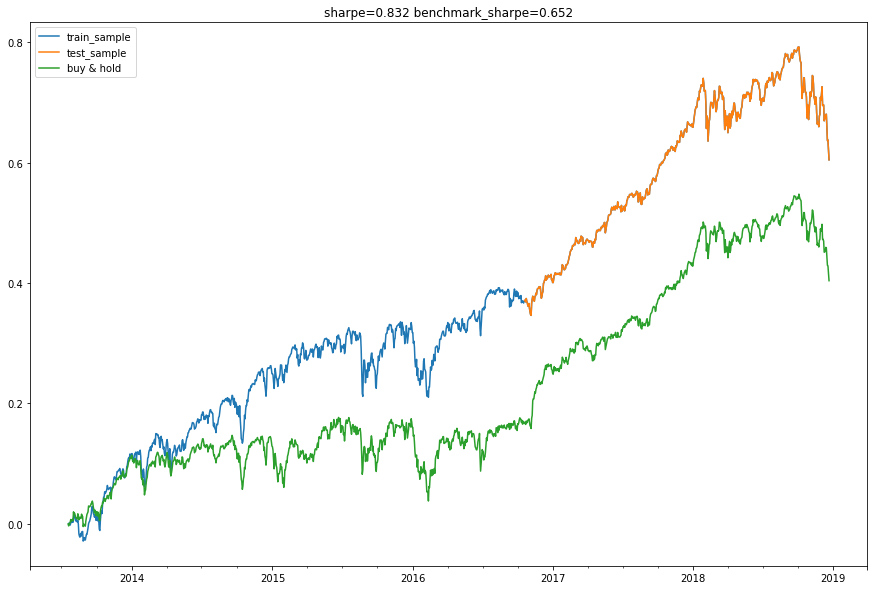

In [19]:
# %% get backtest
returnsAll = get_returns(dataDict, days_predict, plot=False)
returns_train = returnsAll.T[x_train.index].T[symbols]
returns_test = returnsAll.T[x_test.index].T[symbols]
backtest_train_returns = returns_train * predictions_train_normalized
backtest_test_returns = returns_test * predictions_test_normalized
# %% plot it

backtest_total = backtest_train_returns.append(backtest_test_returns).dropna()
test_date = returns_test.index[0]
plt.close()
pnl_total = backtest_total.sum(axis=1).cumsum()
pnl_total.plot()
pnl_total[test_date:].plot()
sharpe = calculateSharpe(backtest_total.sum(axis=1))

benchmark_total = returnsAll / returnsAll.shape[1]
pnl_benchmark = benchmark_total.sum(axis=1).cumsum()
sharpe_benchmark = calculateSharpe(benchmark_total.sum(axis=1))
pnl_benchmark.plot()
plt.legend(['train_sample', 'test_sample', 'buy & hold'])
plt.title('sharpe=%.3f benchmark_sharpe=%.3f'%(sharpe,sharpe_benchmark))
plt.show()

Text(0.5, 1.0, 'sharpe=0.820 benchmark_sharpe=0.652')

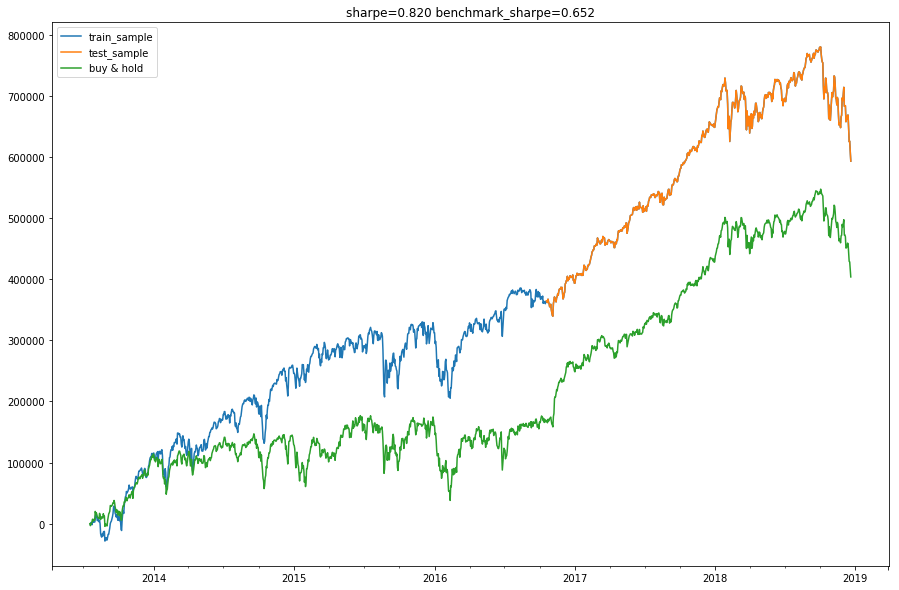

In [20]:
commission_average_etf = 0.44/100
basic_fee = 2
capital=1000000#play with capital to get min balance
#%%%
backtest_train_returns_commission = (backtest_train_returns)*capital - basic_fee - (backtest_train_returns)*capital*commission_average_etf
backtest_test_returns_commission = (backtest_test_returns)*capital - basic_fee - (backtest_test_returns)*capital*commission_average_etf


backtest_total_commission = backtest_train_returns_commission.append(backtest_test_returns_commission).dropna()
plt.close()
pnl_total_commission = backtest_total_commission.sum(axis=1).cumsum()
pnl_total_commission.plot()
pnl_total_commission[test_date:].plot()
plt.close()
pnl_total_commission.plot()
pnl_total_commission[test_date:].plot()

benchmark_total = (returnsAll / returnsAll.shape[1])*capital
pnl_benchmark = benchmark_total.sum(axis=1).cumsum()
pnl_benchmark.plot()
plt.legend(['train_sample', 'test_sample', 'buy & hold'])

sharpe = calculateSharpe(backtest_total_commission.sum(axis=1))
sharpe_benchmark = calculateSharpe(benchmark_total.sum(axis=1))
plt.title('sharpe=%.3f benchmark_sharpe=%.3f'%(sharpe,sharpe_benchmark))